# AI Reference Notebook

### Table of Contents

* [Chapter 1] Data Generation
    * [Section 1.1] Simple Data Generation
        * [Sub Section 1.1.1] Regression
        * [Sub Section 1.1.2] Classification
    * [Section 1.2] Complex Data Generation
        * [Sub Section 1.2.1] Noise Generation
        * [Sub Section 1.2.1] Recurrence
        * [Sub Section 1.2.1] Application
    * [Section 1.3] Tools
        * [Sub Section 1.3.1] MNIST
        * [Sub Section 1.3.2] SciKit
        * [Sub Section 1.3.3] Numpy
        * [Sub Section 1.3.4] Pandas

* [Chapter 2] Model Building
    * [Section 1.1] Classification
        * [Sub Section 1.1.1] Using Simple Data Generated
        * [Sub Section 1.1.2] Using Complex Data Generated
        * [Sub Section 1.1.2] Using Toolkit Generated Data
    * [Section 1.2] Regression
        * [Sub Section 1.1.1] Using Simple Data Generated
        * [Sub Section 1.1.2] Using Complex Data Generated
        * [Sub Section 1.1.2] Using Toolkit Generated Data

* [Chapter 3] Model Optimization
    * [Section 1.1] Classification
        * [Sub Section 1.1.1] Using Simple Data Generated
        * [Sub Section 1.1.2] Using Complex Data Generated
        * [Sub Section 1.1.2] Using Toolkit Generated Data
    * [Section 1.2] Regression
        * [Sub Section 1.1.1] Using Simple Data Generated
        * [Sub Section 1.1.2] Using Complex Data Generated
        * [Sub Section 1.1.2] Using Toolkit Generated Data       



# Classification AI

In [45]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from tensorflow import keras 
from tensorflow.keras import layers
from keras.models import load_model

In [46]:
df = pd.read_csv("Generated Data.csv", index_col="Unnamed: 0")
df.head()

,Inputs,Outputs,Output Class,Inputs 0,Inputs 1,Inputs 2,Inputs 3,Inputs 4
0,"[3, 10, 3, 5, 9]",4.5,8,3,10,3,5,9
1,"[9, 6, 7, 1, 3]",1.5,2,9,6,7,1,3
2,"[8, 2, 2, 2, 10]",5.0,10,8,2,2,2,10
3,"[1, 7, 5, 3, 3]",1.5,2,1,7,5,3,3
4,"[1, 6, 9, 4, 4]",2.0,3,1,6,9,4,4


In [47]:
X = df.copy()[["Inputs 0", "Inputs 1", "Inputs 2", "Inputs 3", "Inputs 4"]]
Y = df.copy()["Output Class"]

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [49]:
len(X_train), len(X_test), len(Y_train), len(Y_test)

(8000, 2000, 8000, 2000)

In [50]:
model = keras.Sequential(
    [
        layers.Dense(64, activation='relu', input_shape=(5, )),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(11, activation="softmax")
    ]
)

loss = keras.losses.SparseCategoricalCrossentropy()
optim = 'sgd'
metrics = ["accuracy"]

target_batch_size = 256
input_batch_size = len(X_train) // target_batch_size

early_stopping = keras.callbacks.EarlyStopping(
    patience = 5,
    min_delta = 0.001,
    restore_best_weights = True
)

model_chkpt = keras.callbacks.ModelCheckpoint(
    "test_model.hdf5",
    monitor='val_accuracy', 
    verbose=0, 
    save_best_only=True, 
    mode='max'
)

model.compile(loss=loss, optimizer=optim, metrics=metrics)

history = model.fit(X_train, 
                    Y_train, 
                    batch_size=input_batch_size, 
                    epochs=100, 
                    verbose=1, 
                    validation_split = 0.2,
                    validation_data=(X_test, Y_test),
                    callbacks = [model_chkpt])

model = load_model("test_model.hdf5")

Epoch 1/100
 89/259 [=========>....................] - ETA: 0s - loss: 2.2077 - accuracy: 0.1664

259/259 [==============================] - 1s 2ms/step - loss: 1.8548 - accuracy: 0.2689 - val_loss: 1.9767 - val_accuracy: 0.2365
Epoch 2/100
120/259 [============>.................] - ETA: 0s - loss: 1.4302 - accuracy: 0.3935

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


259/259 [==============================] - 0s 2ms/step - loss: 1.3719 - accuracy: 0.4178 - val_loss: 1.8544 - val_accuracy: 0.3240
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 1.2295 - accuracy: 0.4744 - val_loss: 2.1272 - val_accuracy: 0.2690
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 1.1581 - accuracy: 0.5039 - val_loss: 1.1521 - val_accuracy: 0.4830
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 1.0899 - accuracy: 0.5278 - val_loss: 1.2608 - val_accuracy: 0.4385
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 1.0209 - accuracy: 0.5611 - val_loss: 1.2502 - val_accuracy: 0.5565
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 1.0188 - accuracy: 0.5500 - val_loss: 0.9515 - val_accuracy: 0.5890
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.9364 - accuracy: 0.5907 - val_loss: 1.0892 - val_accuracy: 0.5345
Epoch 9/100

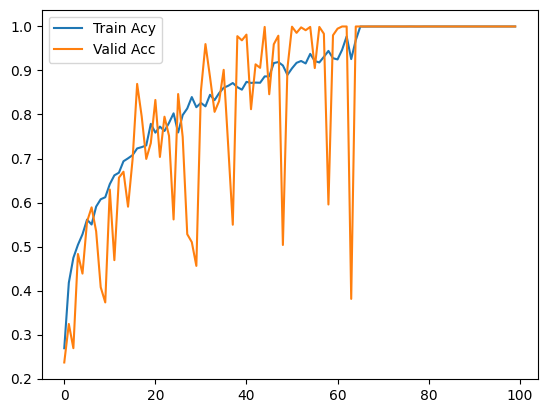

In [52]:
plt.plot(history.history["accuracy"], label="Train Acy")
plt.plot(history.history["val_accuracy"], label="Valid Acc")
plt.legend()
plt.show()

In [53]:
model.evaluate()

ValueError: Failed to find data adapter that can handle input: <class 'NoneType'>, <class 'NoneType'>